# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - !curl method
 - CSV upload method
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Interpolation"

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.php
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [1]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
# Use -s option to have output as silent
#!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
#!curl $flag_data_url | head -n 5
!curl $flag_data_url | wc -l

# Extensions are just a norm! You have to inspect to be sure what something is

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15240  100 15240    0     0  24000      0 --:--:-- --:--:-- --:--:-- 24000
194


In [0]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
flag_data = pd.read_csv(flag_data_url)

In [3]:
# Step 3 - verify we've got *something*
flag_data.head()

,Afghanistan,5,1,648,16,10,2,0,3,5.1,...,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black


In [8]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [0]:
    #check if any NaN values
flag_data.isna().sum()

Afghanistan    0
5              0
1              0
648            0
16             0
10             0
2              0
0              0
3              0
5.1            0
1.1            0
1.2            0
0.1            0
1.3            0
1.4            0
1.5            0
0.2            0
green          0
0.3            0
0.4            0
0.5            0
0.6            0
1.6            0
0.7            0
0.8            0
1.7            0
0.9            0
0.10           0
black          0
green.1        0
dtype: int64

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15240  100 15240    0     0  43542      0 --:--:-- --:--:-- --:--:-- 43542
    194     194   15240


In [0]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [0]:
?pd.read_csv 

In [0]:
??pd.read_csv

In [0]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
flag_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [0]:
flag_data.count()

0     194
1     194
2     194
3     194
4     194
5     194
6     194
7     194
8     194
9     194
10    194
11    194
12    194
13    194
14    194
15    194
16    194
17    194
18    194
19    194
20    194
21    194
22    194
23    194
24    194
25    194
26    194
27    194
28    194
29    194
dtype: int64

In [0]:
flag_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

In [0]:
! curl -s https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.names

1. TItle: Flag database

2. Source Information
   -- Creators: Collected primarily from the "Collins Gem Guide to Flags":
      Collins Publishers (1986).
   -- Donor: Richard S. Forsyth 
             8 Grosvenor Avenue
             Mapperley Park
             Nottingham NG3 5DX
             0602-621676
   -- Date: 5/15/1990

3. Past Usage:
   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.

4. Relevant Information:
   -- This data file contains details of various nations and their flags.
      In this file the fields are separated by spaces (not commas).  With
      this data you can try things like predicting the religion of a country
      from its size and the colours in its flag.  
   -- 10 attributes are numeric-valued.  The remainder are either Boolean-
      or nominal-valued.

5. Number of Instances: 194

6. Number of attributes: 30 (overall)

7. Attribute Information:
   1. name	Name of the country concerned
   2. landmass	1=N.America, 2=S.America,

In [0]:
column_headers = ['name', 'landmass', 'zone', 'area', 'population', 'language',
            'religion', 'bars', 'stripes', 'colors', 'red', 'green', 'blue',
            'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses',
            'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon',
            'animate', 'text', 'topleft', 'botright']
len(column_headers)

30

In [0]:
flag_data = pd.read_csv(flag_data_url, names=column_headers)
pd.set_option('display.max_columns',100)
flag_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colors,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


## Loading from a local CSV to Google Colab

In [0]:
#May not work on firefox
#YOU WILL NEED TO UPLOAD CLEVELAND DATA EACH TIME, THIS IS THE ISSUE WITH COLLAB
#upload: processed.cleveland.data
from google.colab import files as colab_files
colab_files.upload()

## Or can do:
# from google.colab import files
# uploaded = files.upload()
#import io
#df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))
## Dataset is now stored in a Pandas Dataframe

{}

In [0]:
df = pd.read_csv('processed.cleveland.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [0]:
df.rename(columns={0: 'age', 1: 'sex', 2: 'cp'}, inplace=True)
df.head()

,age,sex,cp,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [0]:
columns = ['age','sex','pain','BP', 'chol', 'fbs', 'ecg','maxhr','eiang','eist',
          'slope','vessels','thal','diagnosis']
len(columns)      

14

In [0]:
df = pd.read_csv('processed.cleveland.data',header=None,names=columns, chunksize=100)

In [0]:
#Playing with chunksize
for df_chunk in df:
  print(df_chunk.shape)

(100, 14)
(100, 14)
(100, 14)
(3, 14)


In [0]:
df = pd.read_csv('processed.cleveland.data',header=None,names=columns, chunksize=100)
df_chunk_list=[]
for df_chunk in df:
  df_chunk_list.append(df_chunk)
len(df_chunk_list)

4

In [0]:
df_chunk_list[0]

,age,sex,pain,BP,chol,fbs,ecg,maxhr,eiang,eist,slope,vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


# Part 2 - Basic Visualizations

## Basic Data Visualizations Using Matplotlib

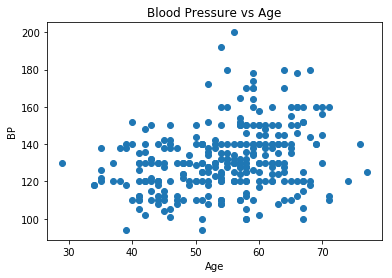

In [0]:
import matplotlib.pyplot as plt

# Scatter Plot
df = pd.read_csv('processed.cleveland.data',header=None,names=columns)
plt.scatter(df['age'],df['BP'])
plt.title('Blood Pressure vs Age')
plt.xlabel('Age')
plt.ylabel('BP')
plt.show()

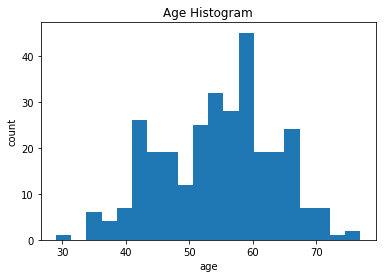

In [0]:
# Histogram
plt.hist(df['age'],bins=20)
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age Histogram')
plt.show()

In [0]:
df['age'].max()

77.0

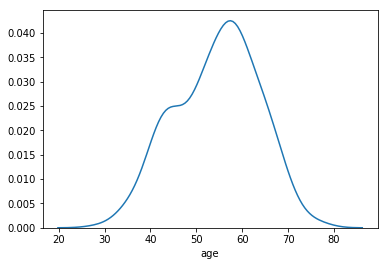

In [0]:
# Seaborn Density Plot
import seaborn as sns

sns.distplot(df['age'],hist=False)

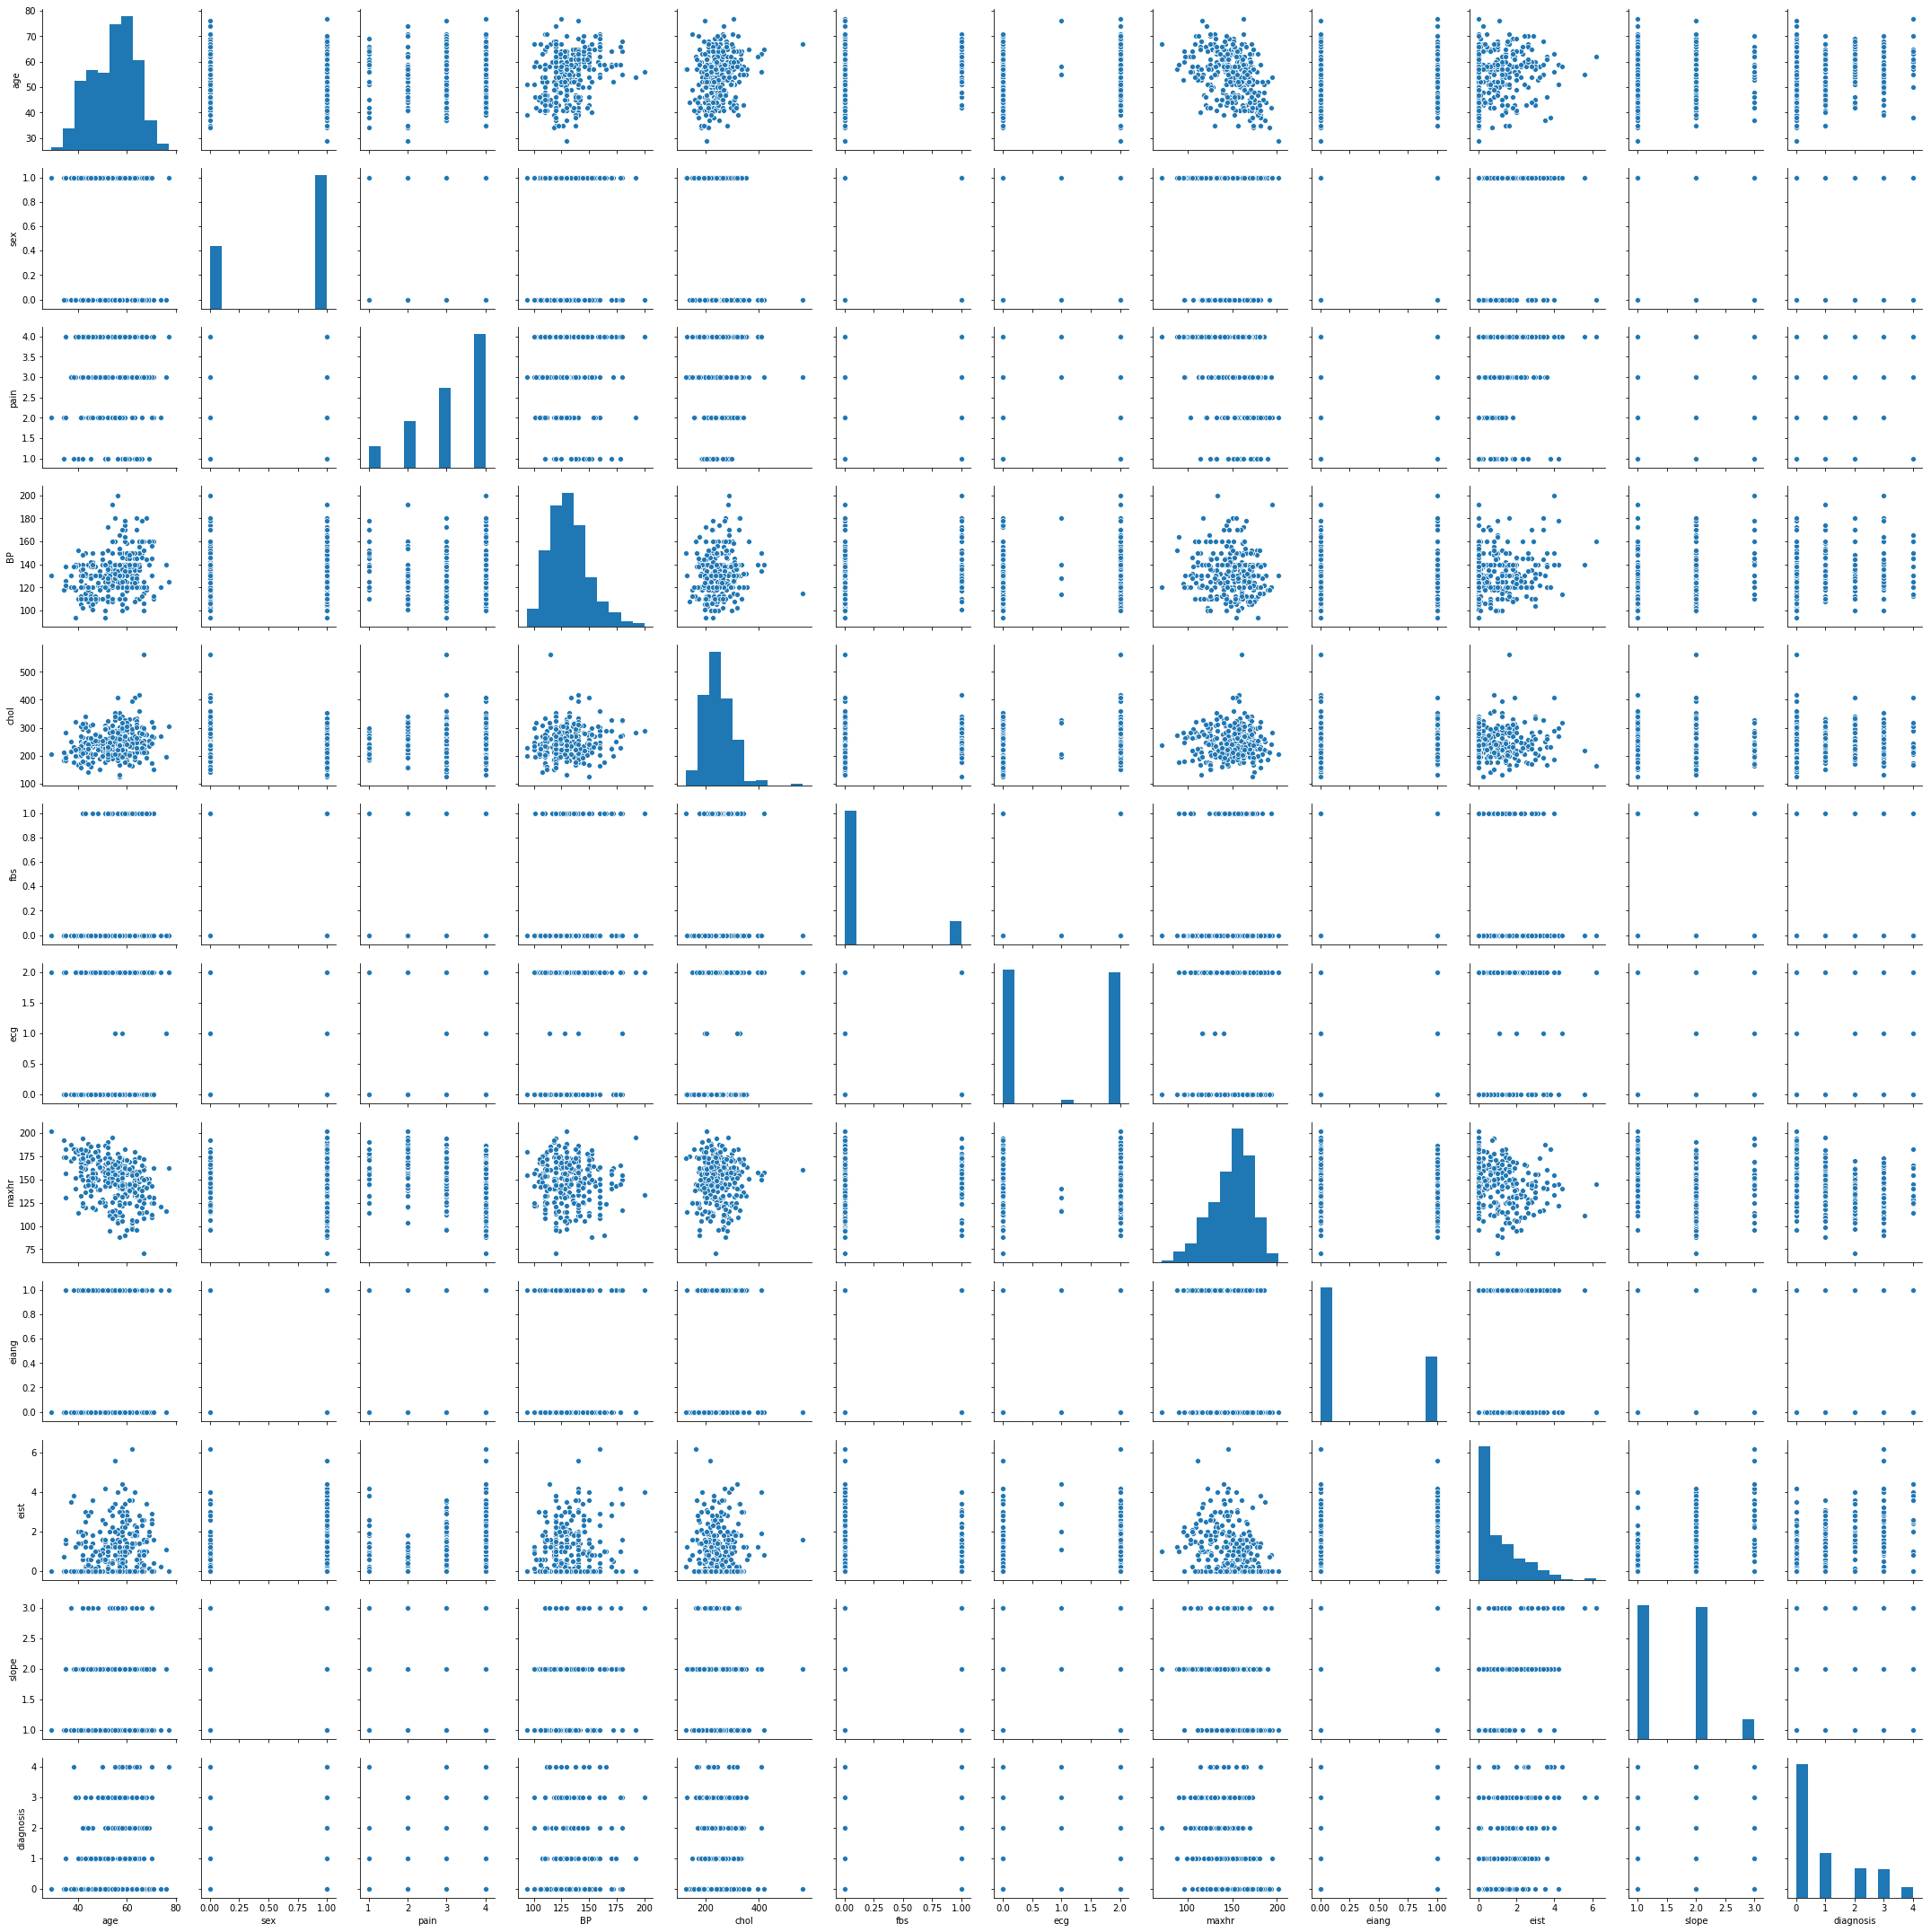

In [0]:
# Seaborn Pairplot
sns.pairplot(df)

## Create the same basic Visualizations using Pandas

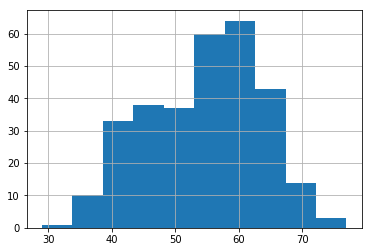

In [0]:
# Pandas Histogram - Look familiar?
df['age'].hist()

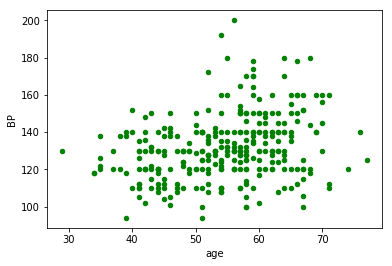

In [0]:
# Pandas Scatterplot
df.plot.scatter(x='age', y='BP', c='g')

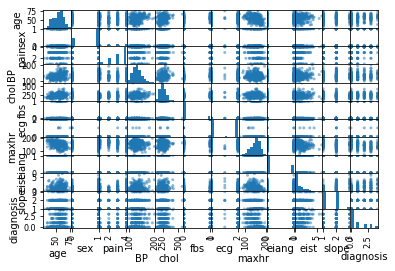

In [0]:
# Pandas Scatter Matrix - Usually doesn't look too great.
from pandas.plotting import scatter_matrix

scatter_matrix(df)
plt.show()

In [0]:
import plotly
plotly.__version__

'3.6.1'

# Part 3 - Deal with Missing Values

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Fill Missing Values

In [0]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [0]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [0]:
#Replace ? with NaN
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')

#Or can do:
# df.replace('?', np.NaN, inplace = True)
#Can also drop na values with df = df.dropna()

In [0]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [0]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [0]:
#To remove whitespace, use str.strip()
#See... compare the output below to the output above
df['workclass']=df['workclass'].str.strip()
df['workclass'].value_counts()


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [0]:
#See datatypes
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [0]:
#TO apply white space across dataset
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

# Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar semi-clean source. You don't want the data that you're working with for this assignment to have any bigger issues than maybe not having headers or including missing values, etc.

After you have chosen your dataset, do the following:

- Import the dataset using the method that you are least comfortable with (!curl or CSV upload).
 - Make sure that your dataset has the number of rows and columns that you expect.
 - Make sure that your dataset has appropriate column names, rename them if necessary.
 - If your dataset uses markers like "?" to indicate missing values, replace them with NaNs during import.
- Identify and fill missing values in your dataset (if any)
 - Don't worry about using methods more advanced than the `.fillna()` function for today.
- Create one of each of the following plots using your dataset
 - Scatterplot
 - Histogram
 - Density Plot
 - Pairplot (note that pairplots will take a long time to load with large datasets or datasets with many columns)

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck!).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [9]:
#I investigated a seemingly popular stellar dataset

#An older, smaller dataset that contains all stars with bridghtness larger than +9.0
#!curl http://www.astronexus.com/files/downloads/hygfull.csv.gz | gunzip 

stellar_data_url = 'http://www.astronexus.com/files/downloads/hygfull.csv.gz'     #small dataset

import pandas as pd
stellar_data = pd.read_csv(stellar_data_url,compression='gzip')

print('Before filling NaN values:')
print(stellar_data.isna().sum())

stellar_data.fillna(0,inplace=True)                 #Replaces filtered dataset NaN values with 0

stellar_data_filtered = stellar_data[stellar_data['Distance'] < 50] #Filters data to closer stars

print('\nAfter filling NaN values:')
print(stellar_data.isna().sum())

print('\n Raw Shape =', stellar_data.shape)               # Prints shape of  rawdataset
print('Filtered Shape =', stellar_data_filtered.shape) # Prints shape of filtered dataset

stellar_data_filtered.head (20)


Before filling NaN values:
StarID                0
Hip                   0
HD                    0
HR                 1510
Gliese             8421
BayerFlamsteed    76762
ProperName        75252
RA                    0
Dec                   0
Distance              0
Mag                   0
AbsMag                0
Spectrum              0
ColorIndex            0
dtype: int64

After filling NaN values:
StarID            0
Hip               0
HD                0
HR                0
Gliese            0
BayerFlamsteed    0
ProperName        0
RA                0
Dec               0
Distance          0
Mag               0
AbsMag            0
Spectrum          0
ColorIndex        0
dtype: int64

 Raw Shape = (87475, 14)
Filtered Shape = (8751, 14)


,StarID,Hip,HD,HR,Gliese,BayerFlamsteed,ProperName,RA,Dec,Distance,Mag,AbsMag,Spectrum,ColorIndex
0,1,2,224690,,,0,0,0.000253,-19.498837,45.662100,9.27,5.972221,K3V,0.999
24,25,38,224752,,,0,0,0.007403,-79.061831,41.946309,8.65,5.536531,G6V,0.778
31,32,47,,,,0,0,0.009013,-56.835248,40.899796,10.78,7.721394,K3V,1.150
36,37,54,,,,0,0,0.010110,17.968956,47.687172,10.57,7.177992,M:,1.030
39,40,57,224789,,,0,0,0.011219,-69.675801,29.507229,8.27,5.920358,K2V,0.863
40,41,58,224792,,,0,0,0.011584,62.176005,38.372985,7.05,4.129872,G0,0.520
48,49,68,224808,,,0,0,0.013376,16.988965,31.446541,8.79,6.302136,K0,0.940
53,54,74,,,,0,0,0.014792,35.752722,41.288192,9.93,6.850871,K5,1.068
59,60,81,224828,,,0,0,0.016258,-4.932115,42.680324,8.57,5.418861,G5,0.642
79,80,110,224873,,,0,0,0.023247,39.610818,48.971596,8.61,5.160279,G5,0.787


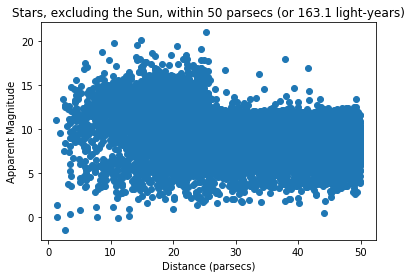

In [10]:
#Scatterplot
import matplotlib.pyplot as plt
plt.scatter(stellar_data_filtered['Distance'],stellar_data_filtered['Mag'])
plt.title('Stars, excluding the Sun, within 50 parsecs (or 163.1 light-years)')
plt.xlabel('Distance (parsecs)')
plt.ylabel('Apparent Magnitude')
plt.show()

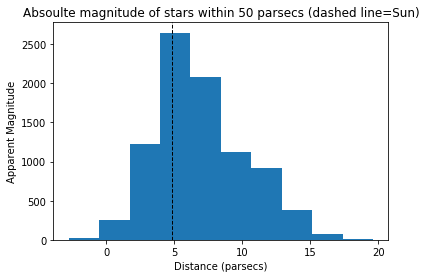

In [11]:
#Histogram Plot
plt.hist(stellar_data_filtered['AbsMag'])
plt.axvline(4.8, color='k', linestyle='dashed', linewidth=1)
plt.title('Absoulte magnitude of stars within 50 parsecs (dashed line=Sun)')
plt.xlabel('Distance (parsecs)')
plt.ylabel('Apparent Magnitude')
plt.show()

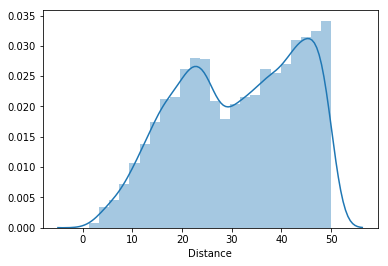

In [12]:
#Seaborn Density Plot
import seaborn as sns
sns.distplot(stellar_data_filtered['Distance'])

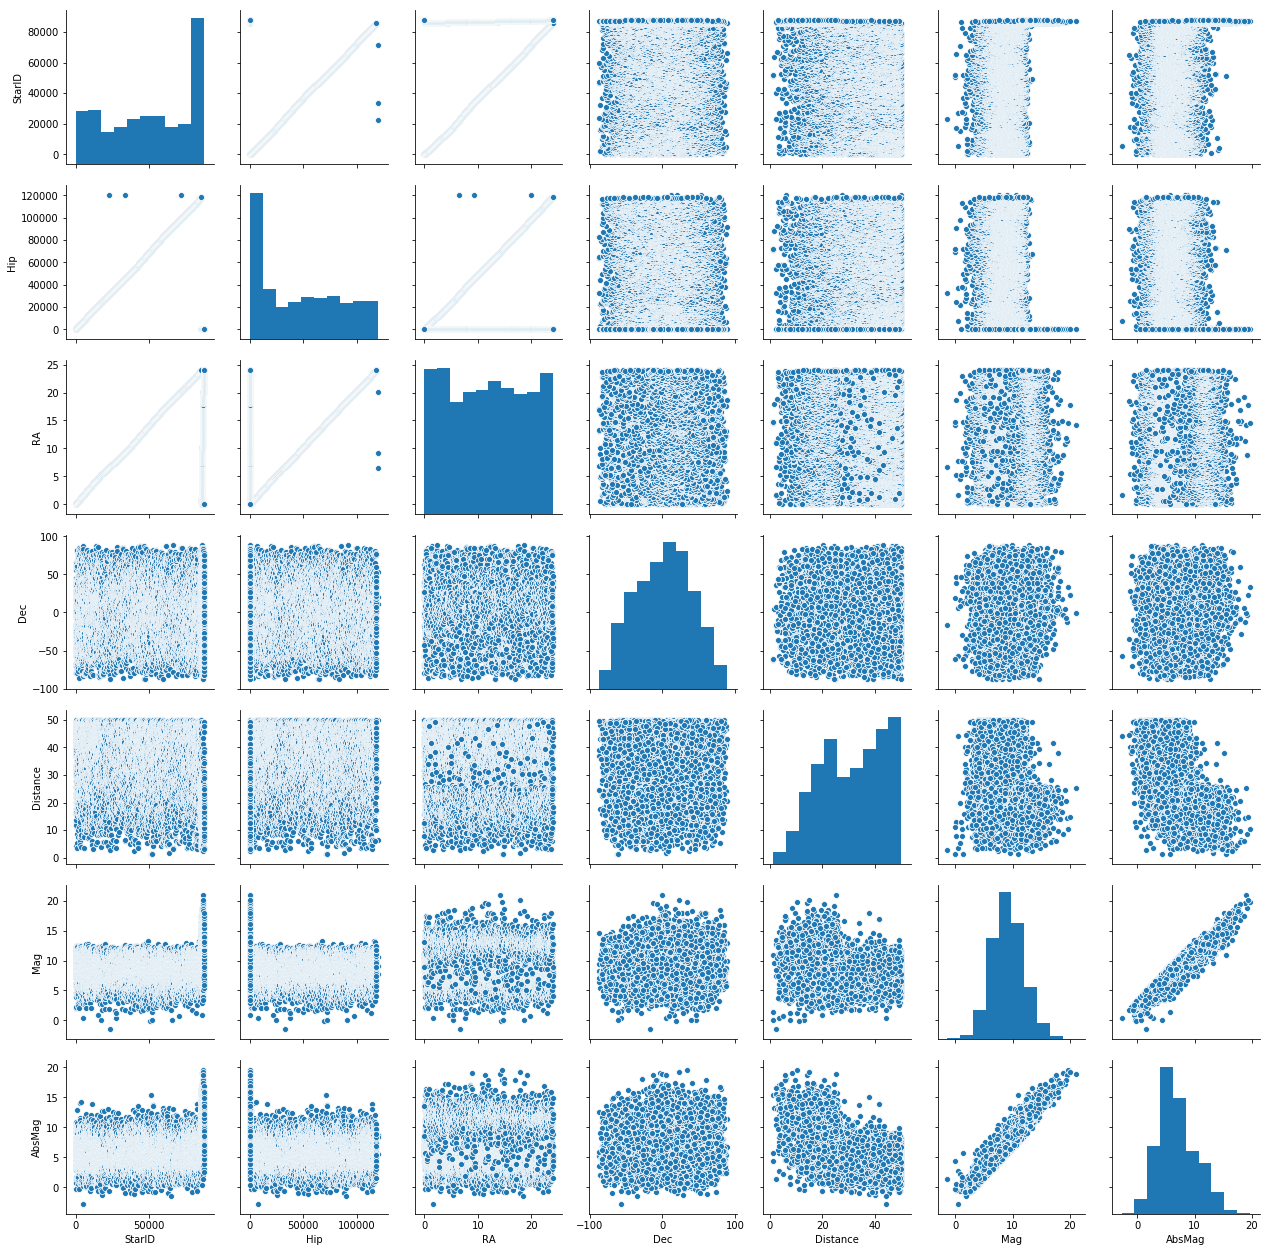

In [13]:
#Seaborn Pairplot
#Notice that only features that are numerical and all filled with numbers are included
sns.pairplot(stellar_data_filtered)

In [0]:
#A newer, larger dataset that contains all stars in  in Hipparcos, Yale Bright Star, and Gliese catalogs (almost 120,000 stars, 14 MB)
#!curl http://www.astronexus.com/files/downloads/hygdata_v3.csv.gz | gunzip  #larger dataset version


#stellar_data_url = 'http://www.astronexus.com/files/downloads/hygdata_v3.csv.gz' #large dataset

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.